# <font color=blue>Assignments for "Assumptions of Linear Regression"</font>

To close out this lesson, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit a link to a single Gist file that contains links to the two notebooks.

## 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from Kaggle.
- Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing* and *pressure*. Estimate the model using OLS.
- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas.api.types as pt
import scipy.stats as stats
from scipy.stats import chi2_contingency
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10}

In [2]:
weather = pd.read_csv("../../data/regression_assignments/weatherHistory.csv")
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.00,15.83,0.00,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.00,15.83,0.00,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.00,14.96,0.00,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.00,15.83,0.00,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.00,15.83,0.00,1016.51,Partly cloudy throughout the day.


In [3]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
var_regress=weather[['Temperature (C)','Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)','Pressure (millibars)']]
var_regress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (C)         96453 non-null  float64
 1   Humidity                96453 non-null  float64
 2   Wind Speed (km/h)       96453 non-null  float64
 3   Wind Bearing (degrees)  96453 non-null  float64
 4   Pressure (millibars)    96453 non-null  float64
dtypes: float64(5)
memory usage: 3.7 MB


In [5]:
var_regress.isnull().sum()*100/var_regress.shape[0]

Temperature (C)          0.00
Humidity                 0.00
Wind Speed (km/h)        0.00
Wind Bearing (degrees)   0.00
Pressure (millibars)     0.00
dtype: float64

In [6]:
import statsmodels.api as sm

Y=var_regress['Temperature (C)']
X=var_regress.loc[:,var_regress.columns!='Temperature (C)']
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:52:30   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### GAUSS MARKOV ASSUMPTIONS

##### ASSUMPTION 1: Check Linearity

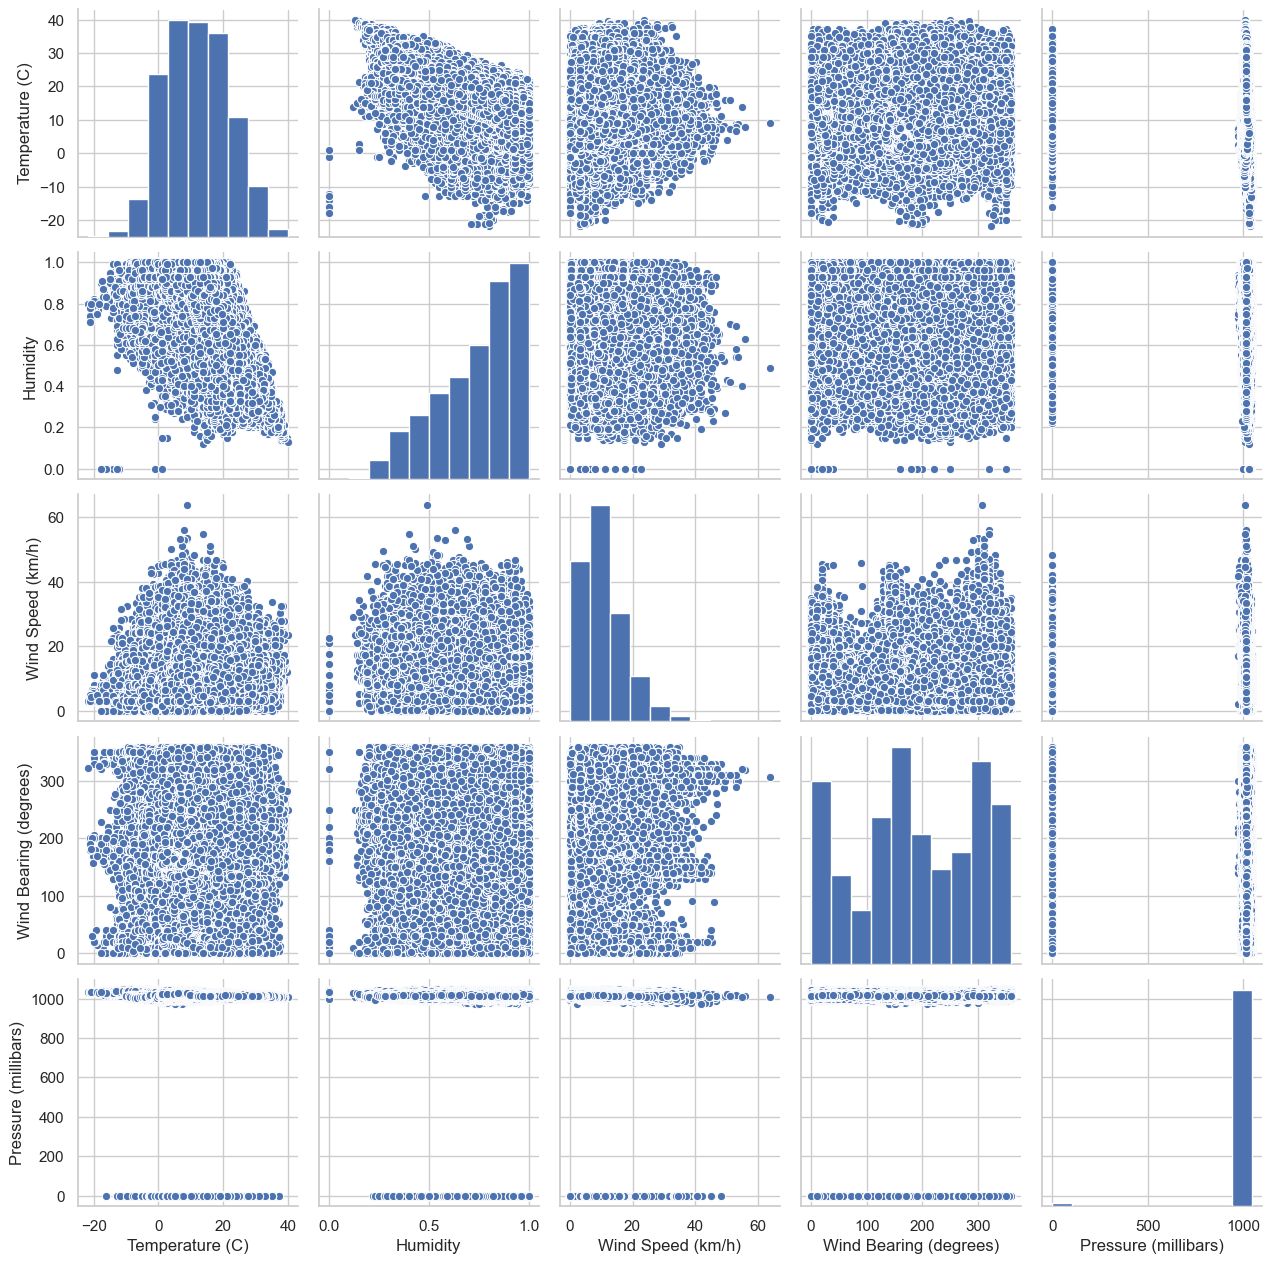

In [7]:
import seaborn as sns

sns.pairplot(var_regress)
plt.show()

**There is no linear relationship between temperature and other variables.**

##### ASSUMPTION 2: Check Error Term

In [8]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}.".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 2.22290929795455e-16.


**The errors are zero on average therefore this assumption is satisfied.**

##### ASSUMPTION 3: Check homoscedasticity

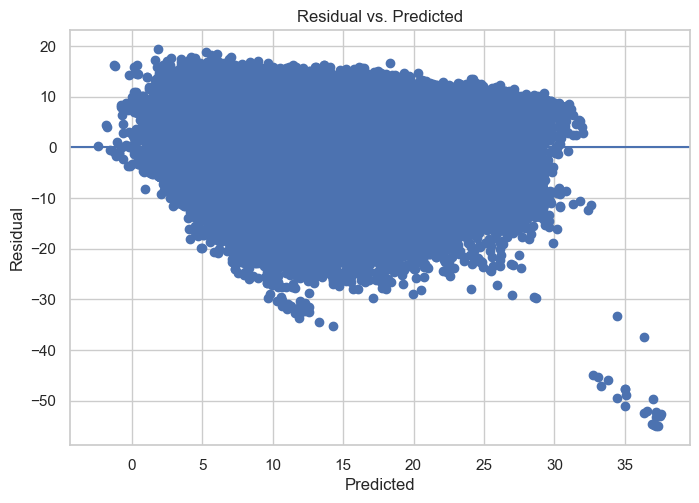

In [9]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [10]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


**The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.**

##### ASSUMPTION 4: Check Multicollinearity

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:52:40   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Warning 2 states that there is strong multicollinearity in this model. This assumption is not met.**

##### ASSUMPTION 5: Check Autocorrelation

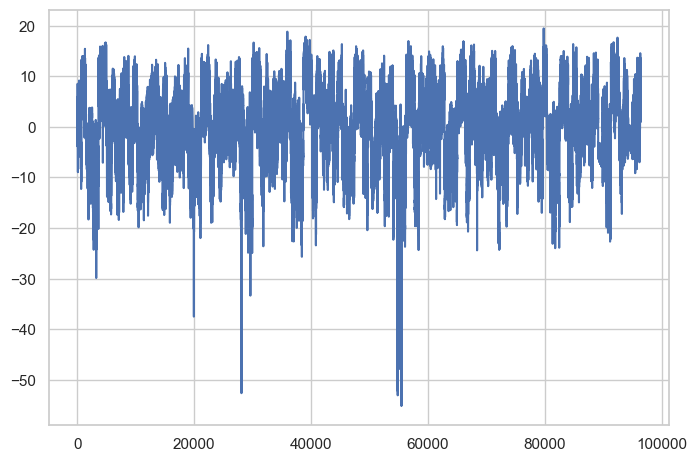

In [12]:
plt.plot(errors)
plt.show()

**It seems that the error terms of our model are uncorrelated with each other.**

##### ASSUMPTION 6: Check Normality

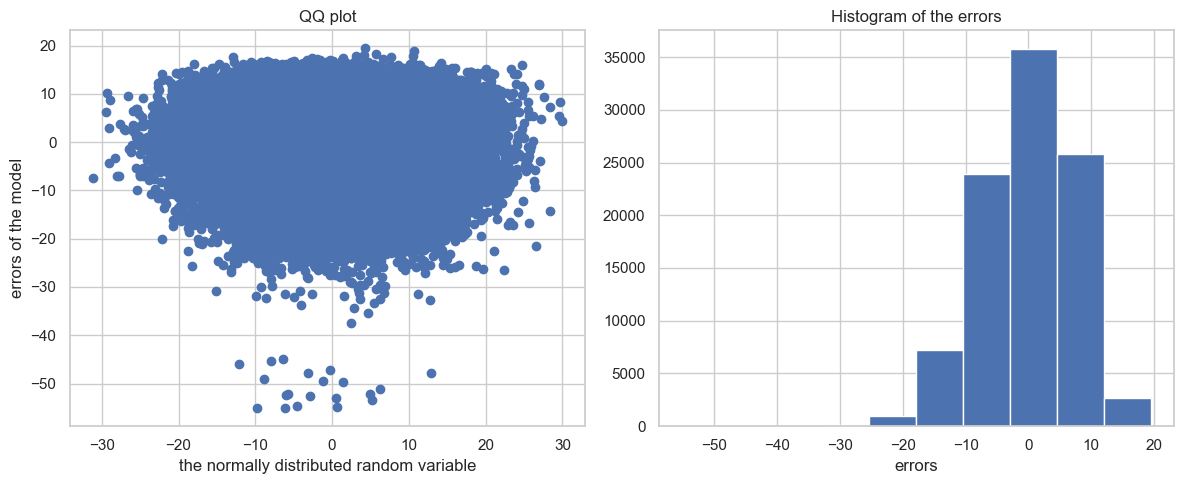

In [13]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [14]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.2967352523483 and p value is 0.0
Normality test statistics is 3375.4323076995674 and p value is 0.0


**The p-values of both tests indicate that our errors are not normally distributed.**

## 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle. 
- Reimplement the model you built in the previous lesson. 
- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

In [15]:
house_prices_train = pd.read_csv("../../data/regression_assignments/train.csv")
variables=house_prices_train[['SalePrice','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','FullBath','Fireplaces',
                                'GarageCars','MSZoning','Street','LotShape','LandContour','BldgType','CentralAir', 'SaleCondition']]
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1460 non-null   int64  
 1   OverallQual    1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   TotalBsmtSF    1460 non-null   int64  
 6   FullBath       1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   GarageCars     1460 non-null   int64  
 9   MSZoning       1460 non-null   object 
 10  Street         1460 non-null   object 
 11  LotShape       1460 non-null   object 
 12  LandContour    1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  SaleCondition  1460 non-null   object 
dtypes: float64(1), int64(8), object(7)
memory usage: 182.6+ KB


In [16]:
variables['MasVnrArea'].fillna(variables['MasVnrArea'].median(),inplace=True)
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1460 non-null   int64  
 1   OverallQual    1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   TotalBsmtSF    1460 non-null   int64  
 6   FullBath       1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   GarageCars     1460 non-null   int64  
 9   MSZoning       1460 non-null   object 
 10  Street         1460 non-null   object 
 11  LotShape       1460 non-null   object 
 12  LandContour    1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  SaleCondition  1460 non-null   object 
dtypes: float64(1), int64(8), object(7)
memory usage: 182.6+ KB


In [17]:
var_numeric=variables.select_dtypes(include=['float64','int64'])
var_cat=variables.select_dtypes(include=['object'])
var_dummies=pd.get_dummies(var_cat,drop_first=True)

var_regress=pd.concat([var_numeric,var_dummies],axis=1)
var_regress

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,7,2003,2003,196.00,856,2,0,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1,181500,6,1976,1976,0.00,1262,2,1,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
2,223500,7,2001,2002,162.00,920,2,1,2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,140000,7,1915,1970,0.00,756,1,1,3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,250000,8,2000,2000,350.00,1145,2,1,3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1999,2000,0.00,953,2,1,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1456,210000,6,1978,1988,119.00,1542,2,2,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1457,266500,7,1941,2006,0.00,1152,2,2,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1458,142125,5,1950,1996,0.00,1078,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [18]:
import statsmodels.api as sm

Y=var_regress['SalePrice']
X=var_regress.loc[:,var_regress.columns!='SalePrice']
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     165.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:52:42   Log-Likelihood:                -17468.
No. Observations:                1460   AIC:                         3.500e+04
Df Residuals:                    1430   BIC:                         3.516e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.883e+05   1.44e+05     -4.084      0.000   -8.71e+05   -3.06e+05
OverallQual            2.273e+04   1218.391     18.652      0.000    2.03e+04    2.51e+04
YearBuilt               -94.7529     56.925     -1.665      0.096    -206.418      16.913
YearRemodAdd            344.8492     67.177      5.133      0.000     213.073     476.625
MasVnrArea               53.3944      6.385      8.362      0.000      40.869      65.920
TotalBsmtSF              30.7939      2.968     10.377      0.000      24.973      36.615
FullBath               1.618e+04   2404.482      6.728      0.000    1.15e+04    2.09e+04
Fireplaces              1.44e+04   1846.114      7.800      0.000    1.08e+04     1.8e+04
GarageCars             1.469e+04   1863.824      7.882      0.000     1.1e+04    1.83e+04
MSZoning_FV             1.66e+04   1.43e+04      1.165      0.244   -1.14e+04    4.46e+04
MSZoning_RH            2.282e+04   1.62e+04      1.408      0.159   -8971.265    5.46e+04
MSZoning_RL            1.962e+04   1.32e+04      1.482      0.139   -6353.434    4.56e+04
MSZoning_RM             1.08e+04   1.33e+04      0.812      0.417   -1.53e+04    3.69e+04
Street_Pave            9136.8451   1.66e+04      0.549      0.583   -2.35e+04    4.18e+04
LotShape_IR2           1.744e+04   6328.812      2.756      0.006    5027.420    2.99e+04
LotShape_IR3          -3.129e+04   1.25e+04     -2.499      0.013   -5.59e+04   -6730.200
LotShape_Reg          -5055.9286   2334.282     -2.166      0.030   -9634.914    -476.943
LandContour_HLS        2.217e+04   7506.814      2.954      0.003    7448.079    3.69e+04
LandContour_Low        3.413e+04   8307.929      4.108      0.000    1.78e+04    5.04e+04
LandContour_Lvl        1.004e+04   5263.741      1.908      0.057    -283.584    2.04e+04
BldgType_2fmCon        -616.0284   7376.455     -0.084      0.933   -1.51e+04    1.39e+04
BldgType_Duplex       -1.342e+04   6118.999     -2.194      0.028   -2.54e+04   -1421.388
BldgType_Twnhs        -2.284e+04   6526.925     -3.499      0.000   -3.56e+04      -1e+04
BldgType_TwnhsE       -2.245e+04   4152.085     -5.407      0.000   -3.06e+04   -1.43e+04
CentralAir_Y          -2603.1858   4732.506     -0.550      0.582   -1.19e+04    6680.213
SaleCondition_AdjLand  7614.7781      2e+04      0.381      0.704   -3.16e+04    4.69e+04
SaleCondition_Alloca   2.444e+04   1.25e+04      1.956      0.051     -74.301     4.9e+04
SaleCondition_Family  -1.321e+04   9528.663     -1.387      0.166   -3.19e+04    5476.862
SaleCondition_Normal   3963.9812   4095.441      0.968      0.333   -4069.735     1.2e+04
SaleCondition_Partial  2.221e+04   5638.317      3.940      0.000    1.12e+04    3.33e+04
==============================================================================
Omnibus:                      590.

#### GAUSS MARKOV ASSUMPTIONS

##### ASSUMPTION 1: Check Linearity

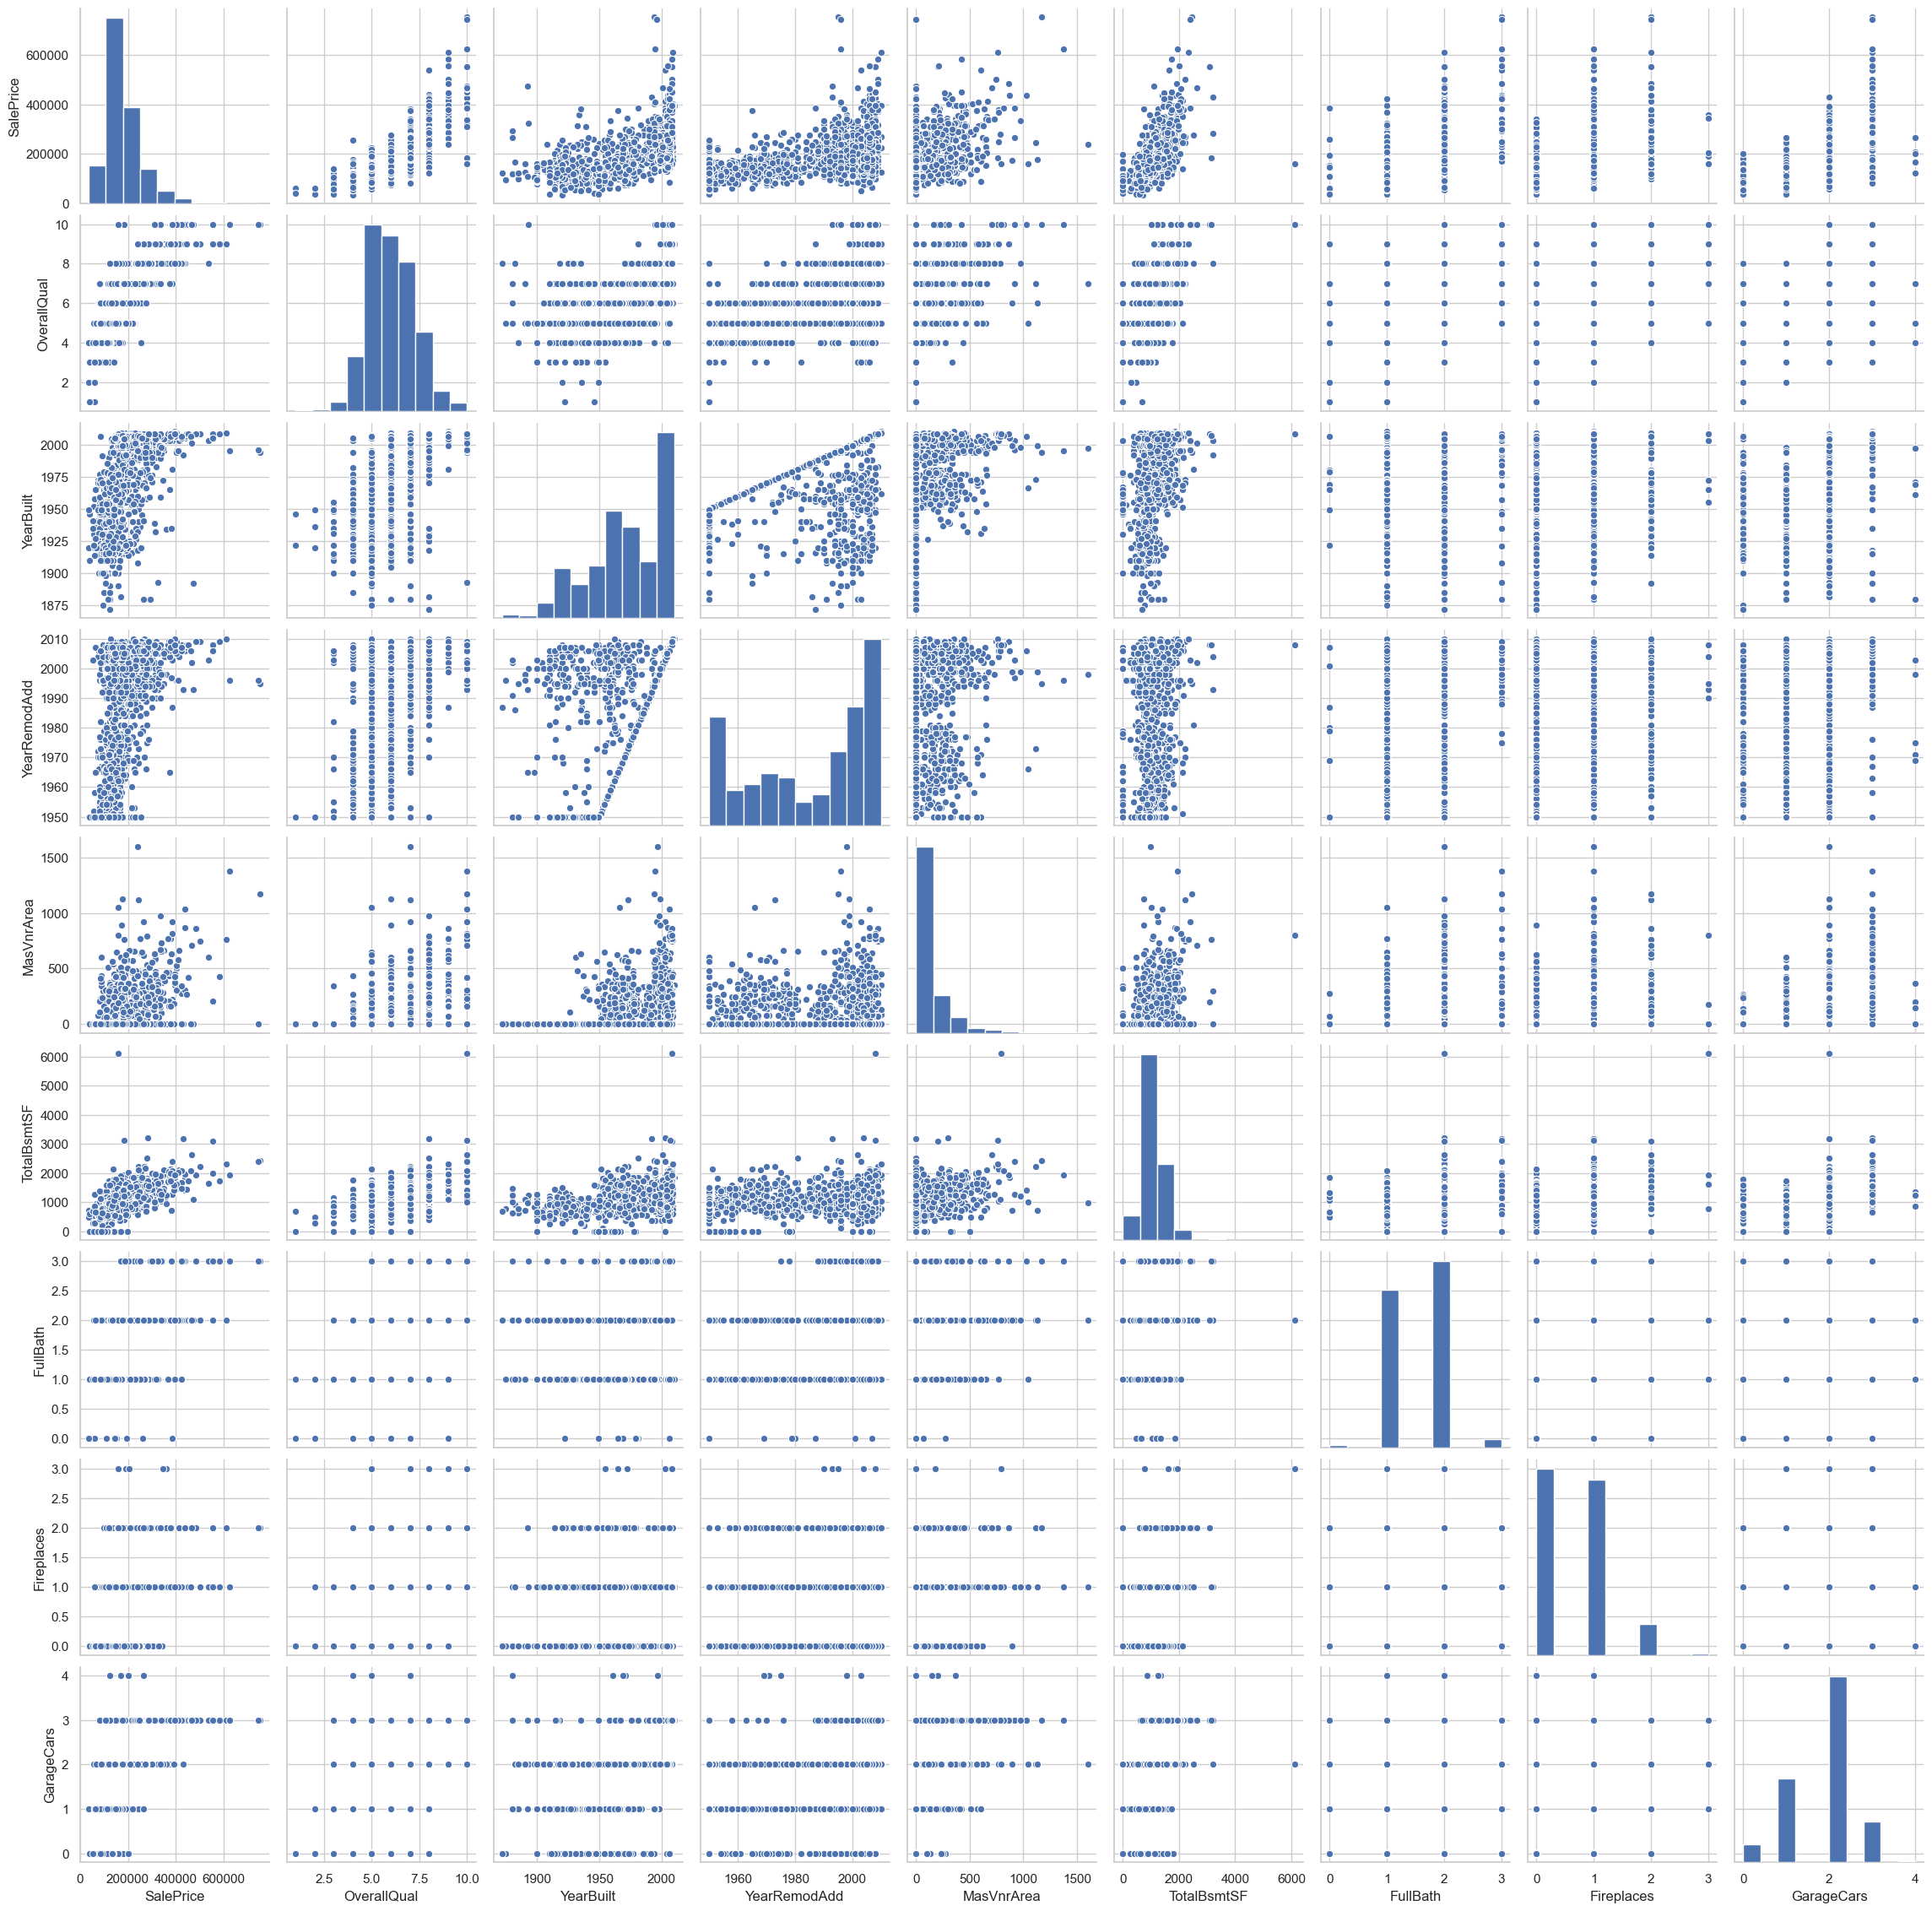

In [19]:
import seaborn as sns

sns.pairplot(var_numeric)
plt.show()

**There is no linear relationship between temperature and other variables except totalBsmtSF.**

##### ASSUMPTION 2: Check Error Term

In [20]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the SalePrice model is: {}.".format(np.mean(errors)))

Mean of the errors in the SalePrice model is: 7.814179136328501e-12.


**The errors are zero on average therefore this assumption is satisfied.**

##### ASSUMPTION 3: Check homoscedasticity

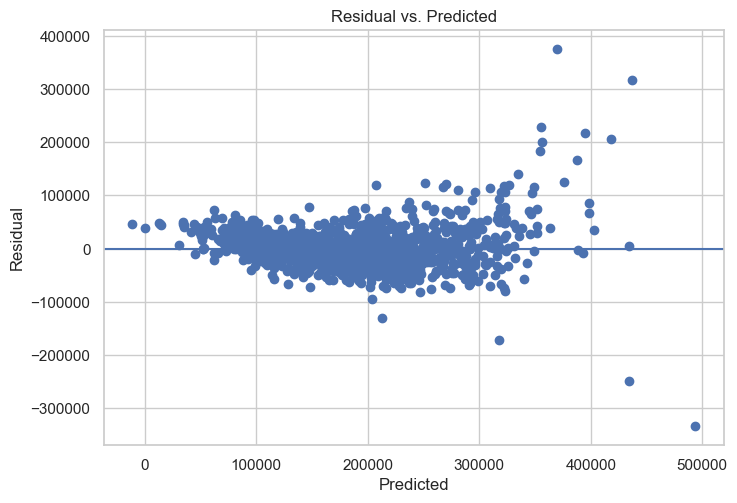

In [21]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [22]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 506.876 and p value is 3.03e-112
Levene test statistic value is 519.672 and p value is 5.35e-106


**The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.**

##### ASSUMPTION 4: Check Multicollinearity

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     165.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:52:59   Log-Likelihood:                -17468.
No. Observations:                1460   AIC:                         3.500e+04
Df Residuals:                    1430   BIC:                         3.516e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.883e+05   1.44e+05     -4.084      0.000   -8.71e+05   -3.06e+05
OverallQual            2.273e+04   1218.391     18.652      0.000    2.03e+04    2.51e+04
YearBuilt               -94.7529     56.925     -1.665      0.096    -206.418      16.913
YearRemodAdd            344.8492     67.177      5.133      0.000     213.073     476.625
MasVnrArea               53.3944      6.385      8.362      0.000      40.869      65.920
TotalBsmtSF              30.7939      2.968     10.377      0.000      24.973      36.615
FullBath               1.618e+04   2404.482      6.728      0.000    1.15e+04    2.09e+04
Fireplaces              1.44e+04   1846.114      7.800      0.000    1.08e+04     1.8e+04
GarageCars             1.469e+04   1863.824      7.882      0.000     1.1e+04    1.83e+04
MSZoning_FV             1.66e+04   1.43e+04      1.165      0.244   -1.14e+04    4.46e+04
MSZoning_RH            2.282e+04   1.62e+04      1.408      0.159   -8971.265    5.46e+04
MSZoning_RL            1.962e+04   1.32e+04      1.482      0.139   -6353.434    4.56e+04
MSZoning_RM             1.08e+04   1.33e+04      0.812      0.417   -1.53e+04    3.69e+04
Street_Pave            9136.8451   1.66e+04      0.549      0.583   -2.35e+04    4.18e+04
LotShape_IR2           1.744e+04   6328.812      2.756      0.006    5027.420    2.99e+04
LotShape_IR3          -3.129e+04   1.25e+04     -2.499      0.013   -5.59e+04   -6730.200
LotShape_Reg          -5055.9286   2334.282     -2.166      0.030   -9634.914    -476.943
LandContour_HLS        2.217e+04   7506.814      2.954      0.003    7448.079    3.69e+04
LandContour_Low        3.413e+04   8307.929      4.108      0.000    1.78e+04    5.04e+04
LandContour_Lvl        1.004e+04   5263.741      1.908      0.057    -283.584    2.04e+04
BldgType_2fmCon        -616.0284   7376.455     -0.084      0.933   -1.51e+04    1.39e+04
BldgType_Duplex       -1.342e+04   6118.999     -2.194      0.028   -2.54e+04   -1421.388
BldgType_Twnhs        -2.284e+04   6526.925     -3.499      0.000   -3.56e+04      -1e+04
BldgType_TwnhsE       -2.245e+04   4152.085     -5.407      0.000   -3.06e+04   -1.43e+04
CentralAir_Y          -2603.1858   4732.506     -0.550      0.582   -1.19e+04    6680.213
SaleCondition_AdjLand  7614.7781      2e+04      0.381      0.704   -3.16e+04    4.69e+04
SaleCondition_Alloca   2.444e+04   1.25e+04      1.956      0.051     -74.301     4.9e+04
SaleCondition_Family  -1.321e+04   9528.663     -1.387      0.166   -3.19e+04    5476.862
SaleCondition_Normal   3963.9812   4095.441      0.968      0.333   -4069.735     1.2e+04
SaleCondition_Partial  2.221e+04   5638.317      3.940      0.000    1.12e+04    3.33e+04
==============================================================================
Omnibus:                      590.

**Warning 2 states that there is strong multicollinearity in this model. This assumption is not met.**

##### ASSUMPTION 5: Check Autocorrelation

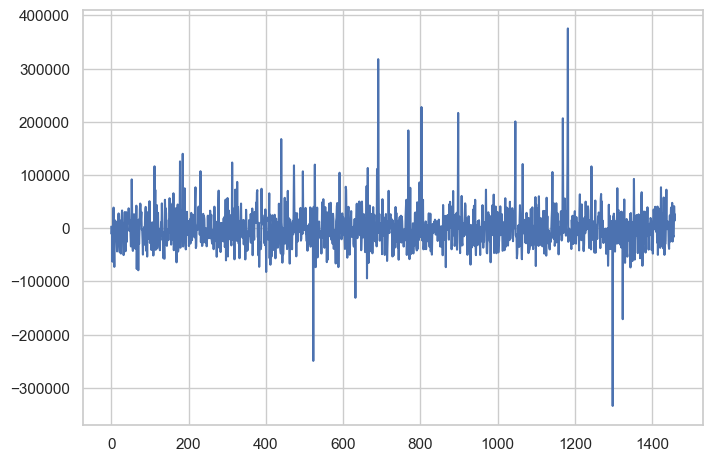

In [24]:
plt.plot(errors)
plt.show()

**It seems that the error terms of our model are uncorrelated with each other.**

##### ASSUMPTION 6: Check Normality

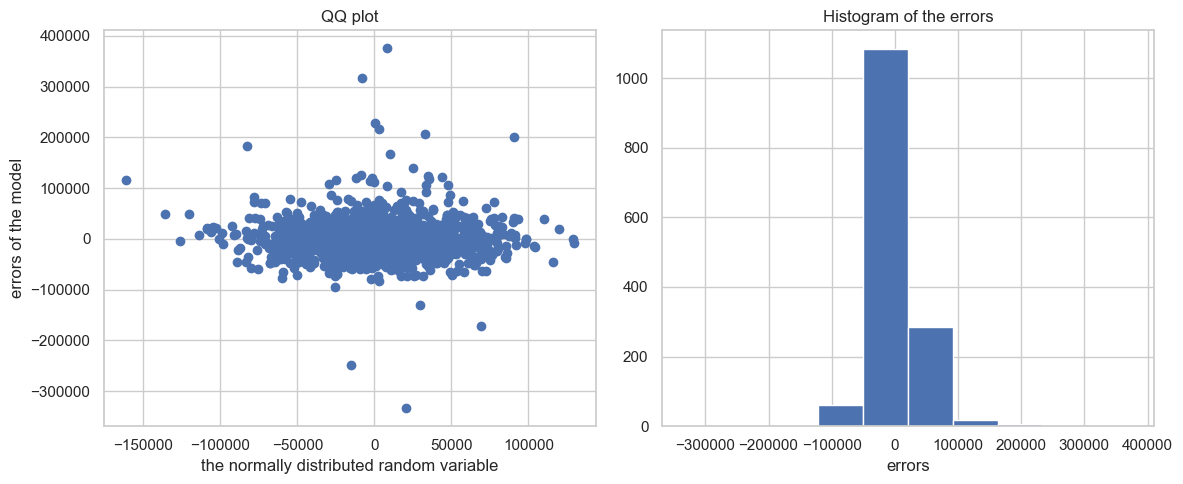

In [25]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [26]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 19908.000695637707 and p value is 0.0
Normality test statistics is 590.9264061250578 and p value is 4.8079650770748875e-129


**The p-values of both tests indicate that our errors are not normally distributed.**